# FitFirst Study

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from pyvis.network import Network
from coloring.fit_first import fit_first
from utils import generate_k_colorable_graph

### Specify parameters here

In [53]:
N = 40    # Number of online k-colorable graphs to generate at each step
k_range = [2,3,4]
n_range = range(100, 1601,100)

In [54]:
def convert_to_dataframe(data:list) -> pd.DataFrame:
    df = pd.DataFrame(data, columns=['k', 'n', 'colors_used', 'ratio', 'N'])
    return df

In [55]:
# <k, n, colors_used, ratio, N>
data = []
for k in k_range:
    for n in tqdm(n_range):
        ratios = []
        for _ in range(N):
            # Initialize the graph
            G = generate_k_colorable_graph(k, n, 0.8)

            # Simulate online coloring
            for idx in range(1, n+1):
                subgraph = G.subgraph(range(idx))
                colors = fit_first(subgraph)
                # Color the graph
                for node, color in colors.items():
                    G.nodes[node]['group'] = color
                
            # Determine the number of colors used
            colors_used = len(set(colors.values()))

            # Determine the ratio of colors used
            ratio = colors_used / k
            ratios.append(ratio)
        
        # Append the data
        data.append([k, n, colors_used, np.mean(ratios), N])
        # Save checkpoint
        _df = convert_to_dataframe(data)
        _df.to_feather(f'../data/fit_first_2_checkpoint.ftr')

# Save the data
df = convert_to_dataframe(data)
df.to_feather(f'../data/fit_first_2.ftr')

100%|██████████| 16/16 [25:38<00:00, 96.17s/it] 


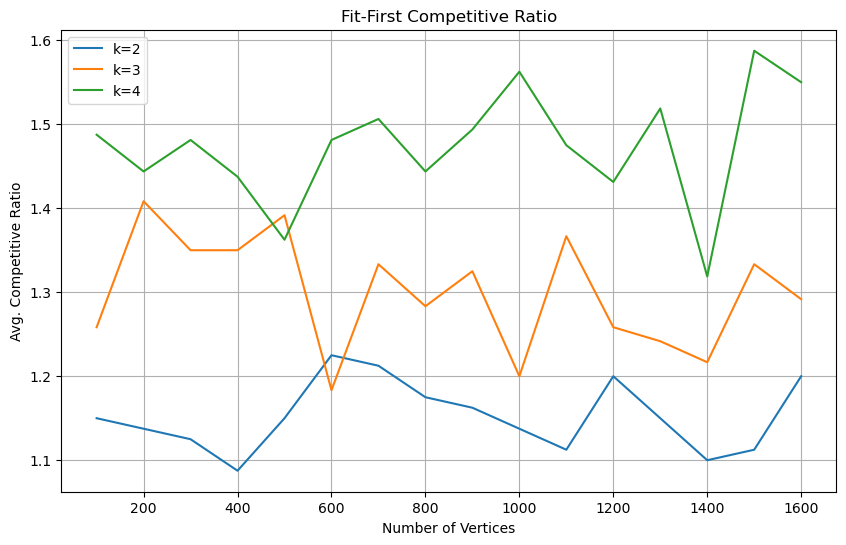

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
for k in k_range:
    _df = df[df.k==k]
    ax.plot(_df.n, _df.ratio, label=f'k={k}')
ax.set_xlabel('Number of Vertices')
ax.set_ylabel('Avg. Competitive Ratio')
ax.legend()
plt.title('Fit-First Competitive Ratio')
plt.grid()
plt.show()

In [65]:
df

,k,n,colors_used,ratio,N
0,2,100,2,1.150000,40
1,2,200,2,1.137500,40
2,2,300,3,1.125000,40
3,2,400,2,1.087500,40
4,2,500,4,1.150000,40
5,2,600,2,1.225000,40
6,2,700,3,1.212500,40
7,2,800,2,1.175000,40
8,2,900,2,1.162500,40
9,2,1000,2,1.137500,40
